In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

from jupyterthemes import jtplot
jtplot.style()

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
reload(C)

OUTPUT_DIR = '/home/d/PERCEPTION/DATA/Figure12/'
if not os.path.exists(OUTPUT_DIR):
  os.makedirs(OUTPUT_DIR)

# Dataset 1

We create a very simple dataset without X and Y variability. Also the width is constant.

This means, we only vary the value of the bars. 

In [3]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure12()
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints, framed=False)
print 'Image Generation done in', time.time()-t0, 'seconds'

#
# Generate images with frame.
#
t0 = time.time()
framed_images, framed_labels = fig.render_many(datapoints, framed=True)
print 'Framed Image Generation done in', time.time()-t0, 'seconds'

# Parameters 25
# Parameters 25
Creating Datapoints done in 1.90548300743 seconds
Image Generation done in 3.63159584999 seconds
Framed Image Generation done in 3.59732413292 seconds


Datapoint 86693
Label False


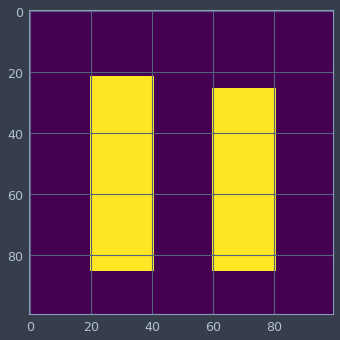

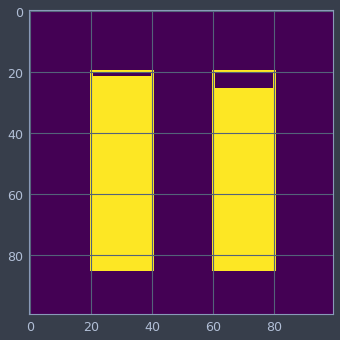

In [4]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

plt.figure()
im = plt.imshow(images[INDEX])

plt.figure()
im = plt.imshow(framed_images[INDEX])



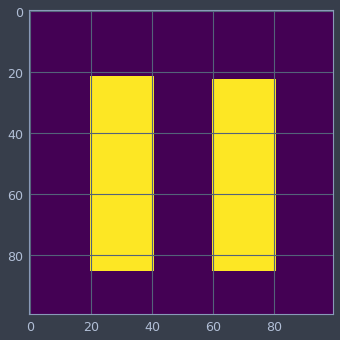

In [5]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

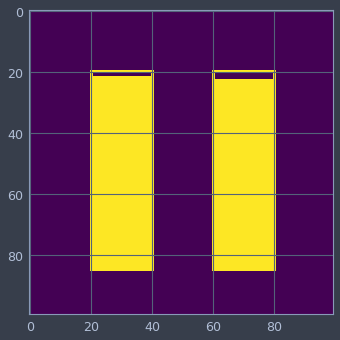

In [6]:
framed_images_raveled = framed_images.reshape(100000,100*100).astype(np.float32)
framed_images_raveled -= .5

a = framed_images_raveled.reshape(100000,100,100)
imshow(a[16387])

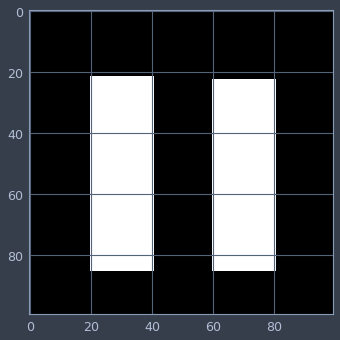

In [7]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

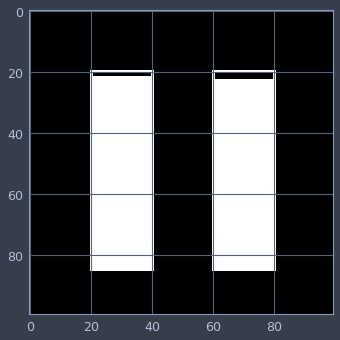

In [8]:
framed_images_3d = np.stack((framed_images,)*3, -1)
framed_images_3d_raveled = framed_images_3d.reshape(100000, 100*100*3).astype(np.float32)
framed_images_3d_raveled -= .5

a = framed_images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [9]:
INDEX = 1

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
np.save(OUTPUT_DIR+'framed_images_'+str(INDEX)+'.npy', framed_images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)

#
# for framed
#
X = framed_images_3d_raveled.reshape(100000,100,100,3)

VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features (Framed) done after', time.time()-t0

np.save(OUTPUT_DIR+'framed_vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features (Framed) done after', time.time()-t0

np.save(OUTPUT_DIR+'framed_xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)


stored datapoints
stored labels
storeds image arrays 2d/3d numpy


Using TensorFlow backend.


100000/100000 [==============================] - 279s 3ms/step
VGG19 features done after 278.839601994
100000/100000 [==============================] - 209s 2ms/step
Xception features done after 209.461316824
100000/100000 [==============================] - 273s 3ms/step
VGG19 features (Framed) done after 272.54681015
100000/100000 [==============================] - 210s 2ms/step
Xception features (Framed) done after 210.009819031


# Dataset 2
We add Y variability.

This means, we not only vary the value of the bars but also the Y coordinate.

In [10]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure12(variable_y=True)
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints, framed=False)
print 'Image Generation done in', time.time()-t0, 'seconds'

#
# Generate images with frame.
#
t0 = time.time()
framed_images, framed_labels = fig.render_many(datapoints, framed=True)
print 'Framed Image Generation done in', time.time()-t0, 'seconds'

# Parameters 15625
Creating Datapoints done in 2.89847493172 seconds
Image Generation done in 9.22409105301 seconds
Framed Image Generation done in 3.82164287567 seconds


Datapoint 24202
Label False


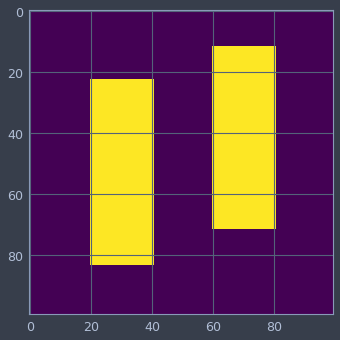

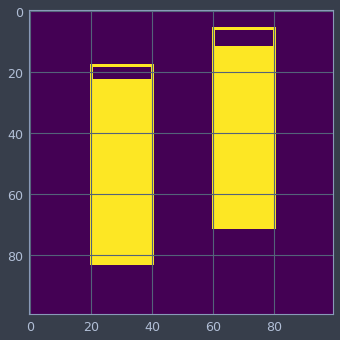

In [11]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

plt.figure()
im = plt.imshow(images[INDEX])

plt.figure()
im = plt.imshow(framed_images[INDEX])



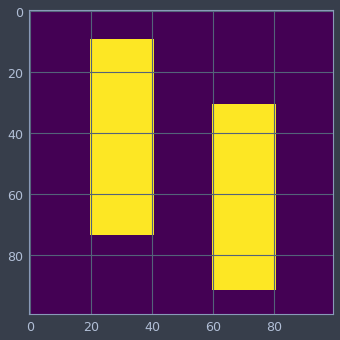

In [12]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

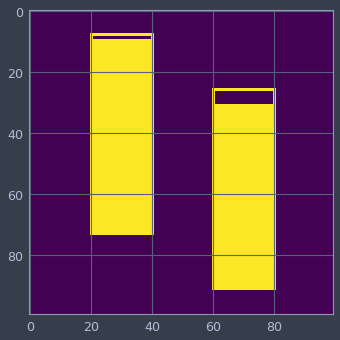

In [13]:
framed_images_raveled = framed_images.reshape(100000,100*100).astype(np.float32)
framed_images_raveled -= .5

a = framed_images_raveled.reshape(100000,100,100)
imshow(a[16387])

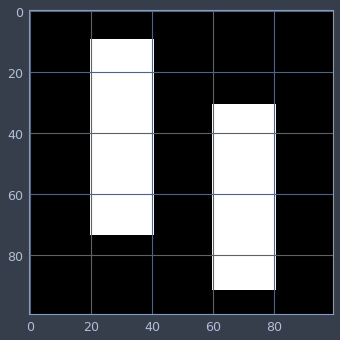

In [14]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

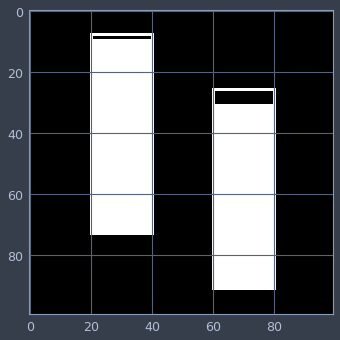

In [15]:
framed_images_3d = np.stack((framed_images,)*3, -1)
framed_images_3d_raveled = framed_images_3d.reshape(100000, 100*100*3).astype(np.float32)
framed_images_3d_raveled -= .5

a = framed_images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [16]:
INDEX = 2

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
np.save(OUTPUT_DIR+'framed_images_'+str(INDEX)+'.npy', framed_images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)

#
# for framed
#
X = framed_images_3d_raveled.reshape(100000,100,100,3)

VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features (Framed) done after', time.time()-t0

np.save(OUTPUT_DIR+'framed_vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features (Framed) done after', time.time()-t0

np.save(OUTPUT_DIR+'framed_xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)


stored datapoints
stored labels
storeds image arrays 2d/3d numpy
100000/100000 [==============================] - 272s 3ms/step
VGG19 features done after 272.404985189
100000/100000 [==============================] - 210s 2ms/step
Xception features done after 210.069331884
100000/100000 [==============================] - 273s 3ms/step
VGG19 features (Framed) done after 272.587969065
100000/100000 [==============================] - 212s 2ms/step
Xception features (Framed) done after 211.792495966


# Dataset 3
We add also variable width in addition to Y variability.

This means, we not only vary the value of the bars, the Y coordinates, but also the width of the rectangles.

In [17]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure12(variable_y=True, variable_width=True)
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints, framed=False)
print 'Image Generation done in', time.time()-t0, 'seconds'

#
# Generate images with frame.
#
t0 = time.time()
framed_images, framed_labels = fig.render_many(datapoints, framed=True)
print 'Framed Image Generation done in', time.time()-t0, 'seconds'



# Parameters 1562500
Creating Datapoints done in 3.72890114784 seconds
Image Generation done in 6.18612289429 seconds
Framed Image Generation done in 9.00694608688 seconds


Datapoint 28908
Label True


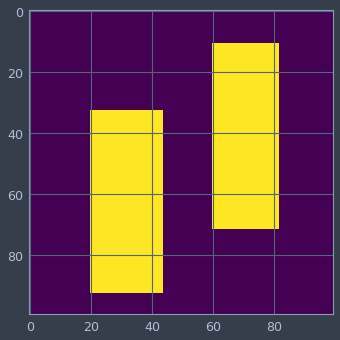

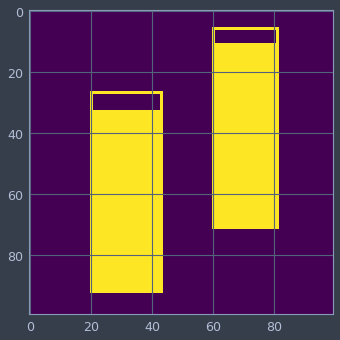

In [18]:

#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

plt.figure()
im = plt.imshow(images[INDEX])

plt.figure()
im = plt.imshow(framed_images[INDEX])


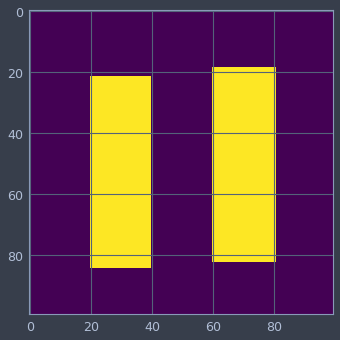

In [19]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

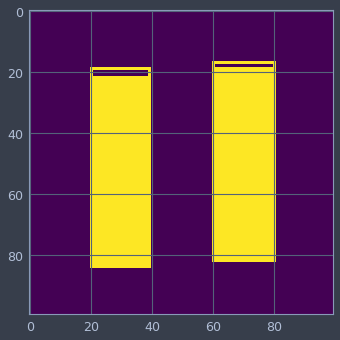

In [20]:
framed_images_raveled = framed_images.reshape(100000,100*100).astype(np.float32)
framed_images_raveled -= .5

a = framed_images_raveled.reshape(100000,100,100)
imshow(a[16387])

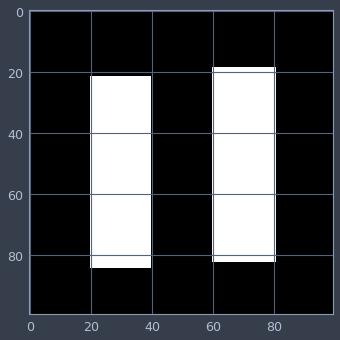

In [21]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

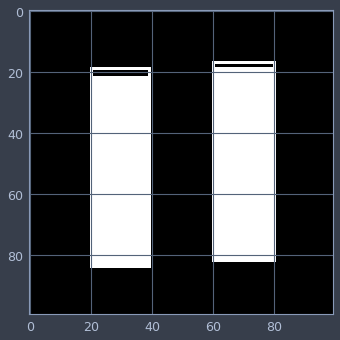

In [22]:
framed_images_3d = np.stack((framed_images,)*3, -1)
framed_images_3d_raveled = framed_images_3d.reshape(100000, 100*100*3).astype(np.float32)
framed_images_3d_raveled -= .5

a = framed_images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [23]:
INDEX = 3

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
np.save(OUTPUT_DIR+'framed_images_'+str(INDEX)+'.npy', framed_images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)

#
# for framed
#
X = framed_images_3d_raveled.reshape(100000,100,100,3)

VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features (Framed) done after', time.time()-t0

np.save(OUTPUT_DIR+'framed_vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features (Framed) done after', time.time()-t0

np.save(OUTPUT_DIR+'framed_xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)

stored datapoints
stored labels
storeds image arrays 2d/3d numpy
100000/100000 [==============================] - 273s 3ms/step
VGG19 features done after 273.443980932
100000/100000 [==============================] - 211s 2ms/step
Xception features done after 211.266847849
100000/100000 [==============================] - 276s 3ms/step
VGG19 features (Framed) done after 275.593118906
100000/100000 [==============================] - 217s 2ms/step
Xception features (Framed) done after 217.328135014


# Dataset 4
We add also X variability to variable width and to Y variability.

This means, we not only vary the value of the bars, the Y coordinates, but also the width of the rectangles as well as the X coordinates.

In [24]:
#
# CREATE SINGLE DATAPOINT
#
fig = C.Figure12(variable_y=True, variable_width=True, variable_x=True)
fig.create(verbose=True)

#
# Make many datapoints
#
t0 = time.time()
datapoints, labels = fig.make_many(N=100000)
print 'Creating Datapoints done in', time.time()-t0, 'seconds'

#
# Generate images without frame.
#
t0 = time.time()
images, labels = fig.render_many(datapoints, framed=False)
print 'Image Generation done in', time.time()-t0, 'seconds'

#
# Generate images with frame.
#
t0 = time.time()
framed_images, framed_labels = fig.render_many(datapoints, framed=True)
print 'Framed Image Generation done in', time.time()-t0, 'seconds'

# Parameters 156250000
Creating Datapoints done in 4.63055300713 seconds
Image Generation done in 3.97525620461 seconds
Framed Image Generation done in 3.88855290413 seconds


Datapoint 73216
Label False


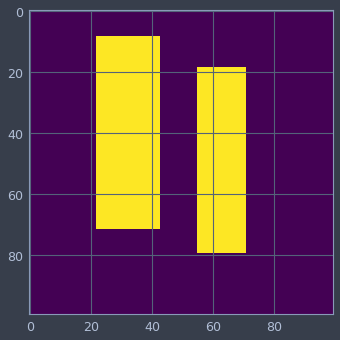

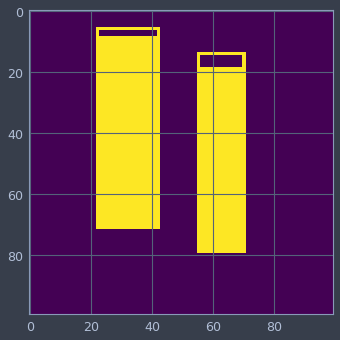

In [25]:
#
# RANDOM VISUALIZATION
#
INDEX = np.random.randint(len(datapoints))
print 'Datapoint', INDEX
print 'Label', labels[INDEX]

plt.figure()
im = plt.imshow(images[INDEX])

plt.figure()
im = plt.imshow(framed_images[INDEX])

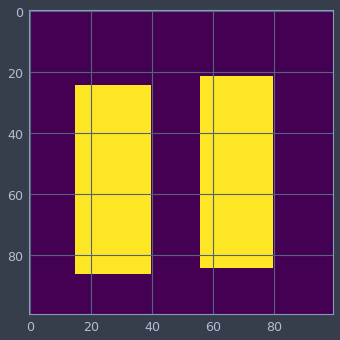

In [26]:
#
# DATA AS RAVELED NUMPY 2D ARRAY
#
images_raveled = images.reshape(100000,100*100).astype(np.float32)
images_raveled -= .5

a = images_raveled.reshape(100000,100,100)
imshow(a[16387])

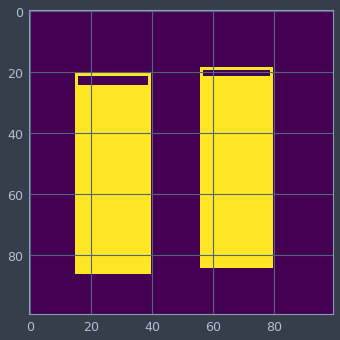

In [27]:
framed_images_raveled = framed_images.reshape(100000,100*100).astype(np.float32)
framed_images_raveled -= .5

a = framed_images_raveled.reshape(100000,100,100)
imshow(a[16387])

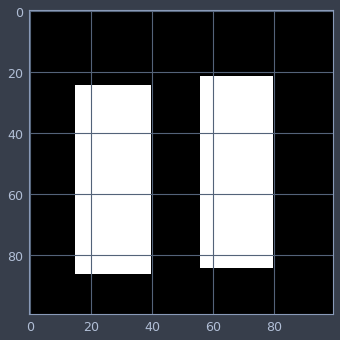

In [28]:
#
# WE ALSO NEED THE DATA AS A 3D NUMPY ARRAY (RAVELED)
#
images_3d = np.stack((images,)*3, -1)
images_3d_raveled = images_3d.reshape(100000, 100*100*3).astype(np.float32)
images_3d_raveled -= .5

a = images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

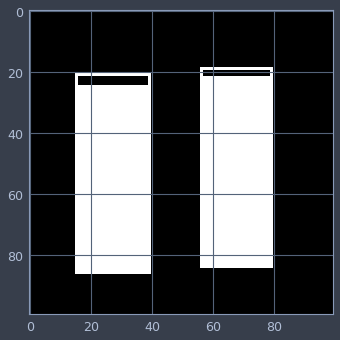

In [29]:
framed_images_3d = np.stack((framed_images,)*3, -1)
framed_images_3d_raveled = framed_images_3d.reshape(100000, 100*100*3).astype(np.float32)
framed_images_3d_raveled -= .5

a = framed_images_3d_raveled.reshape(100000,100,100,3)
imshow(a[16387]+.5) # .5 for RGB visualization required

In [30]:
INDEX = 4

# let's store the datapoints
with open(OUTPUT_DIR+'datapoints_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(datapoints, f)
print 'stored datapoints'
with open(OUTPUT_DIR+'labels_'+str(INDEX)+'.p', 'w') as f:
  pickle.dump(labels, f)
print 'stored labels'
  
# Then, let's store the vanilla image data
#
# This data is randomized but matches the labels
# and is normalized to -.5 .. .5
np.save(OUTPUT_DIR+'images_'+str(INDEX)+'.npy', images_raveled, allow_pickle=False)
np.save(OUTPUT_DIR+'framed_images_'+str(INDEX)+'.npy', framed_images_raveled, allow_pickle=False)
# .. now the vanilla images 3D
#np.save(OUTPUT_DIR+'images_rgb_'+str(INDEX)+'.npy', images_3d_raveled, allow_pickle=False)

print 'storeds image arrays 2d/3d numpy'

#
#
# OTHER CLASSIFIERS AS FEATURE GENERATORS
#
#
import keras.applications
X = images_3d_raveled.reshape(100000,100,100,3)


VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features done after', time.time()-t0

np.save(OUTPUT_DIR+'vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features done after', time.time()-t0

np.save(OUTPUT_DIR+'xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)

#
# for framed
#
X = framed_images_3d_raveled.reshape(100000,100,100,3)

VGG19 = keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = VGG19.predict(X, verbose=True)
print 'VGG19 features (Framed) done after', time.time()-t0

np.save(OUTPUT_DIR+'framed_vgg19_features'+str(INDEX)+'.npy', features, allow_pickle=False)

Xception = keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(100,100,3))

t0 = time.time()
features = Xception.predict(X, verbose=True)
print 'Xception features (Framed) done after', time.time()-t0

np.save(OUTPUT_DIR+'framed_xception_features'+str(INDEX)+'.npy', features, allow_pickle=False)

stored datapoints
stored labels
storeds image arrays 2d/3d numpy
100000/100000 [==============================] - 274s 3ms/step
VGG19 features done after 273.926197767
100000/100000 [==============================] - 213s 2ms/step
Xception features done after 213.19276309
100000/100000 [==============================] - 275s 3ms/step
VGG19 features (Framed) done after 274.696017027
100000/100000 [==============================] - 220s 2ms/step
Xception features (Framed) done after 220.086866856
